<a href="https://colab.research.google.com/github/nicolerene91/diamonds/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

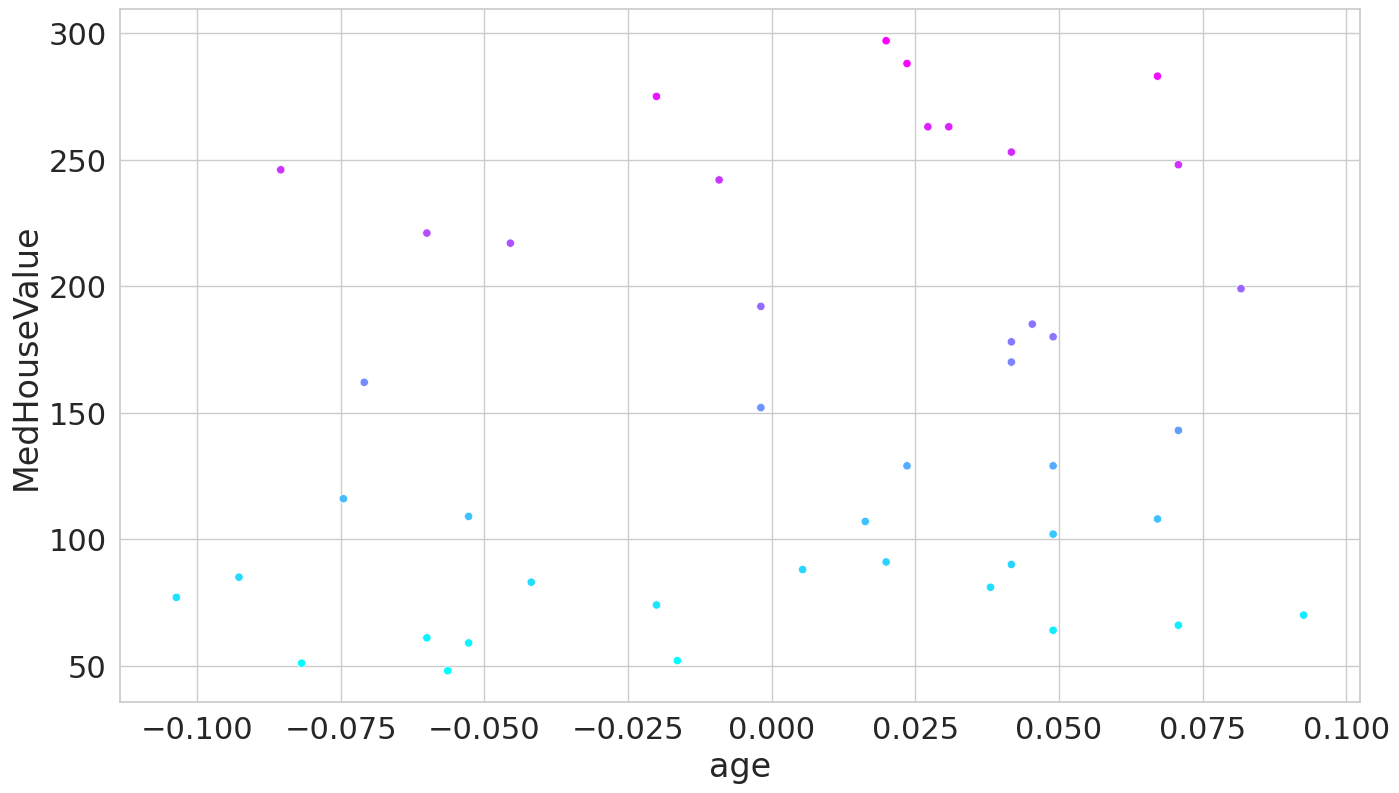

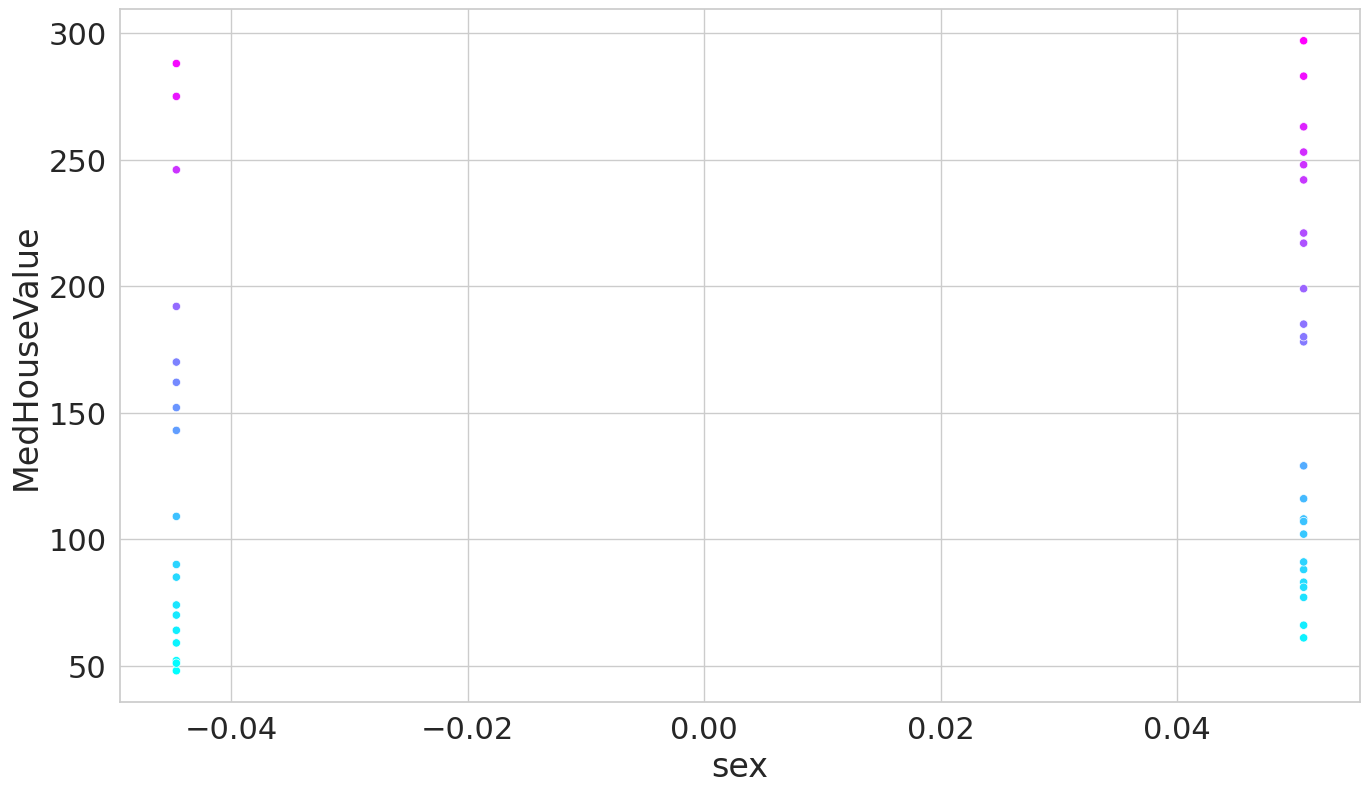

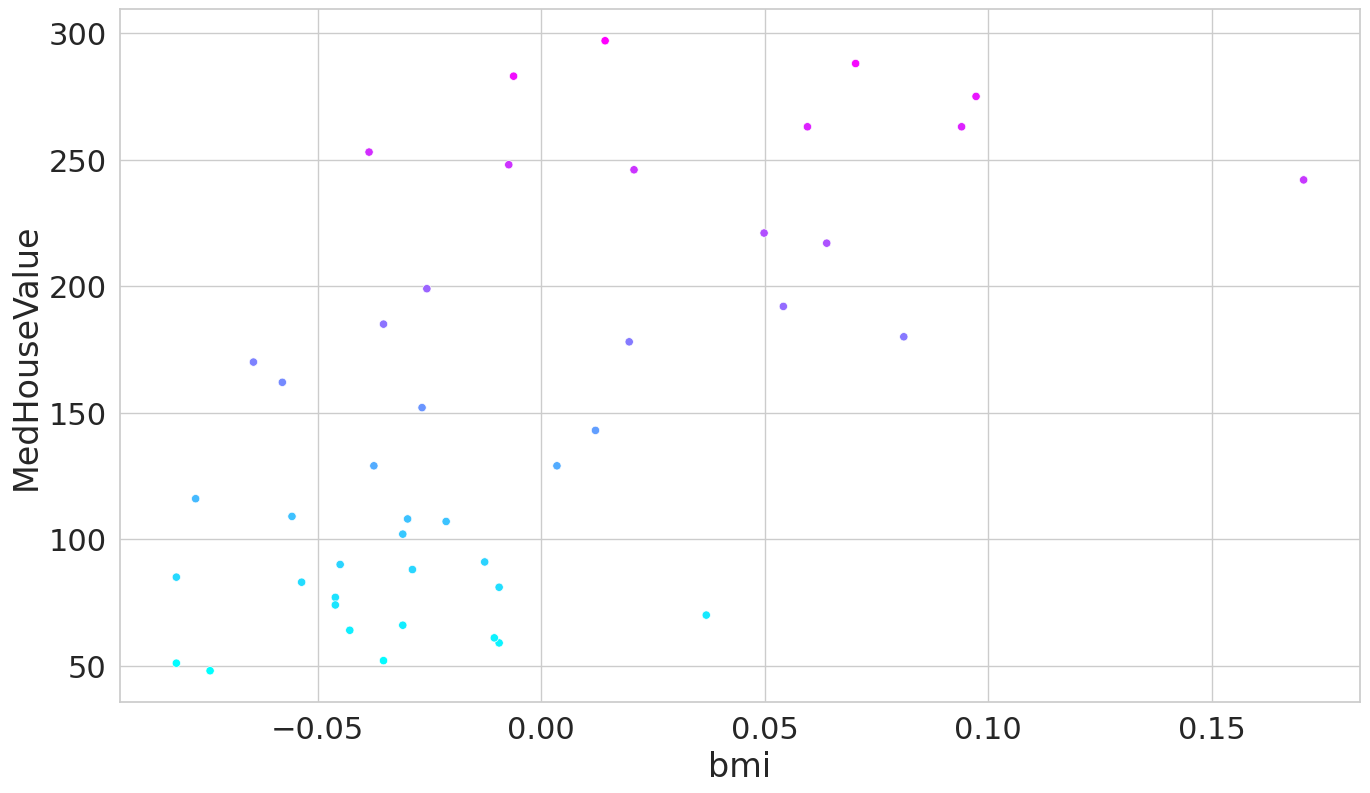

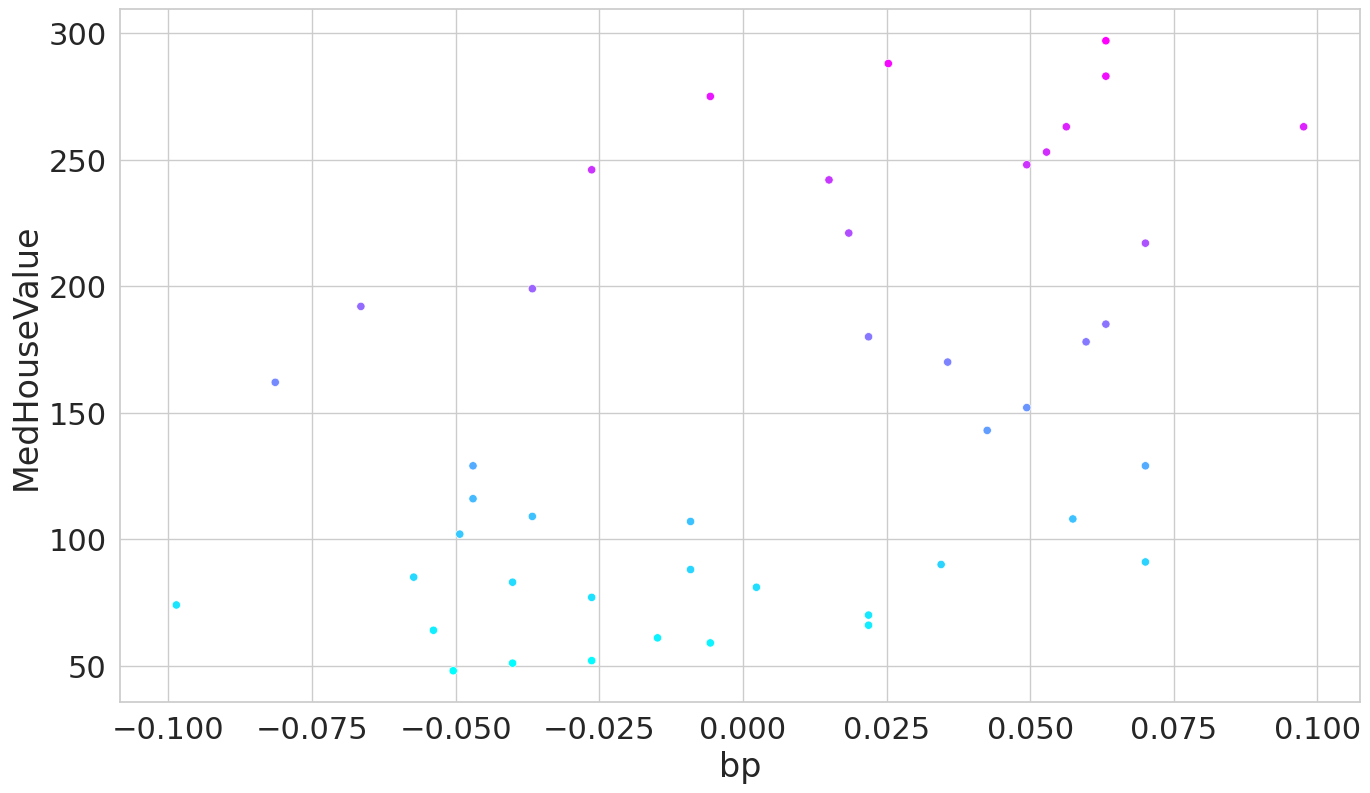

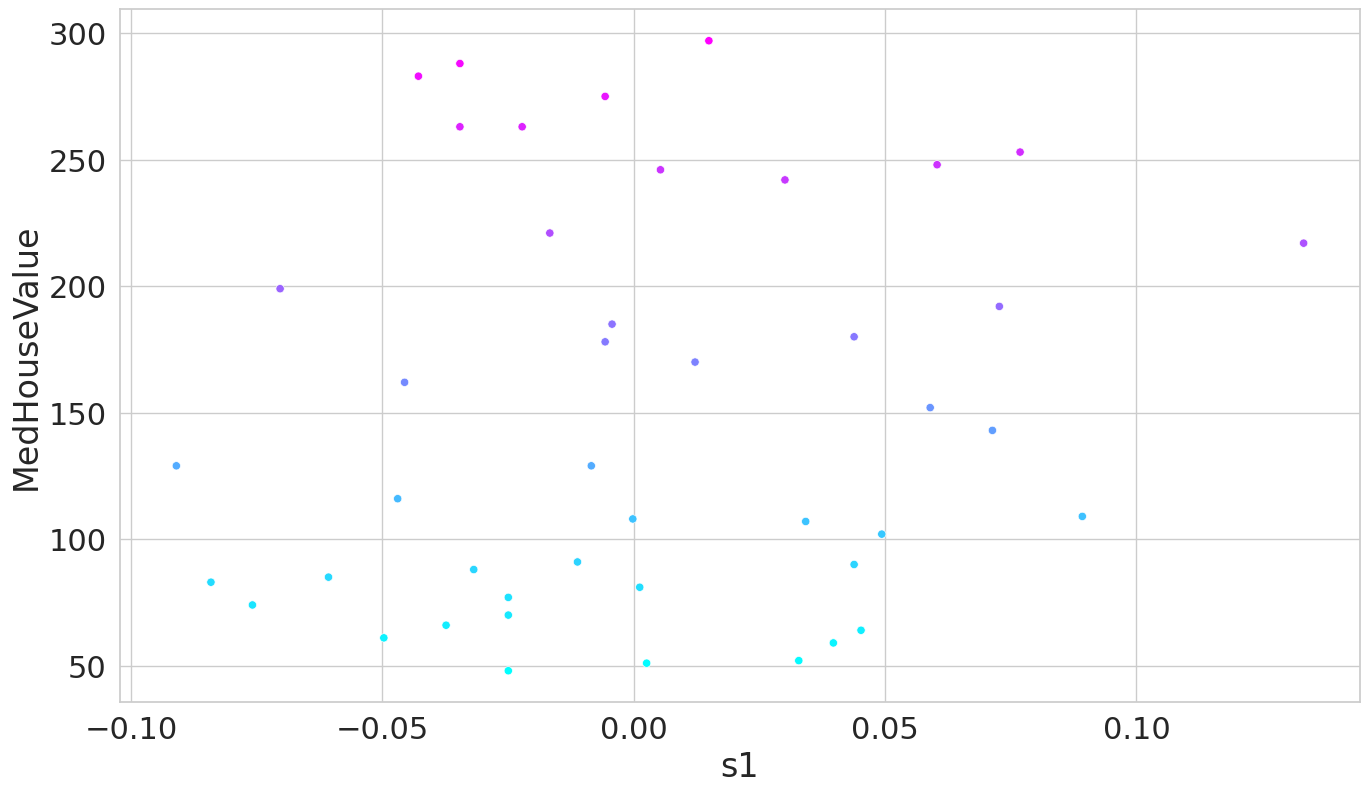

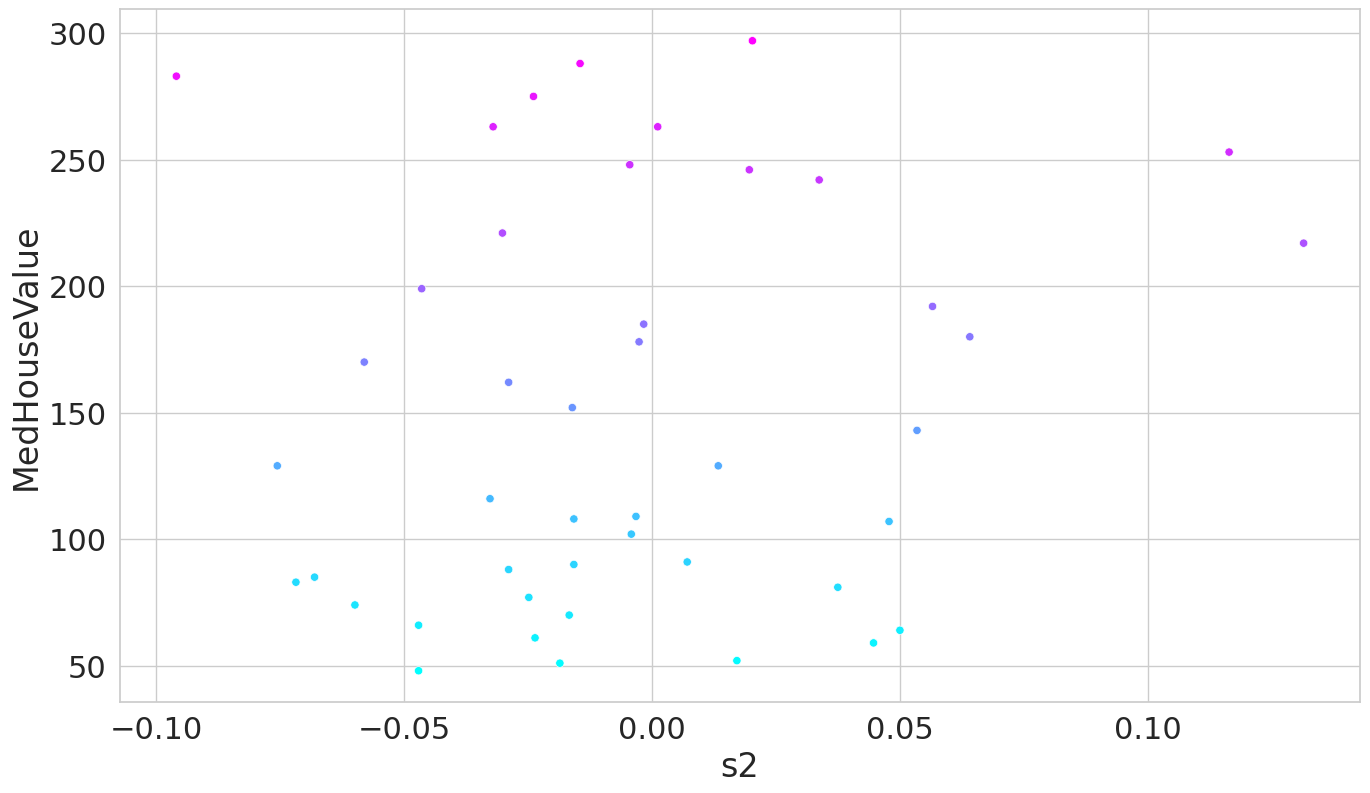

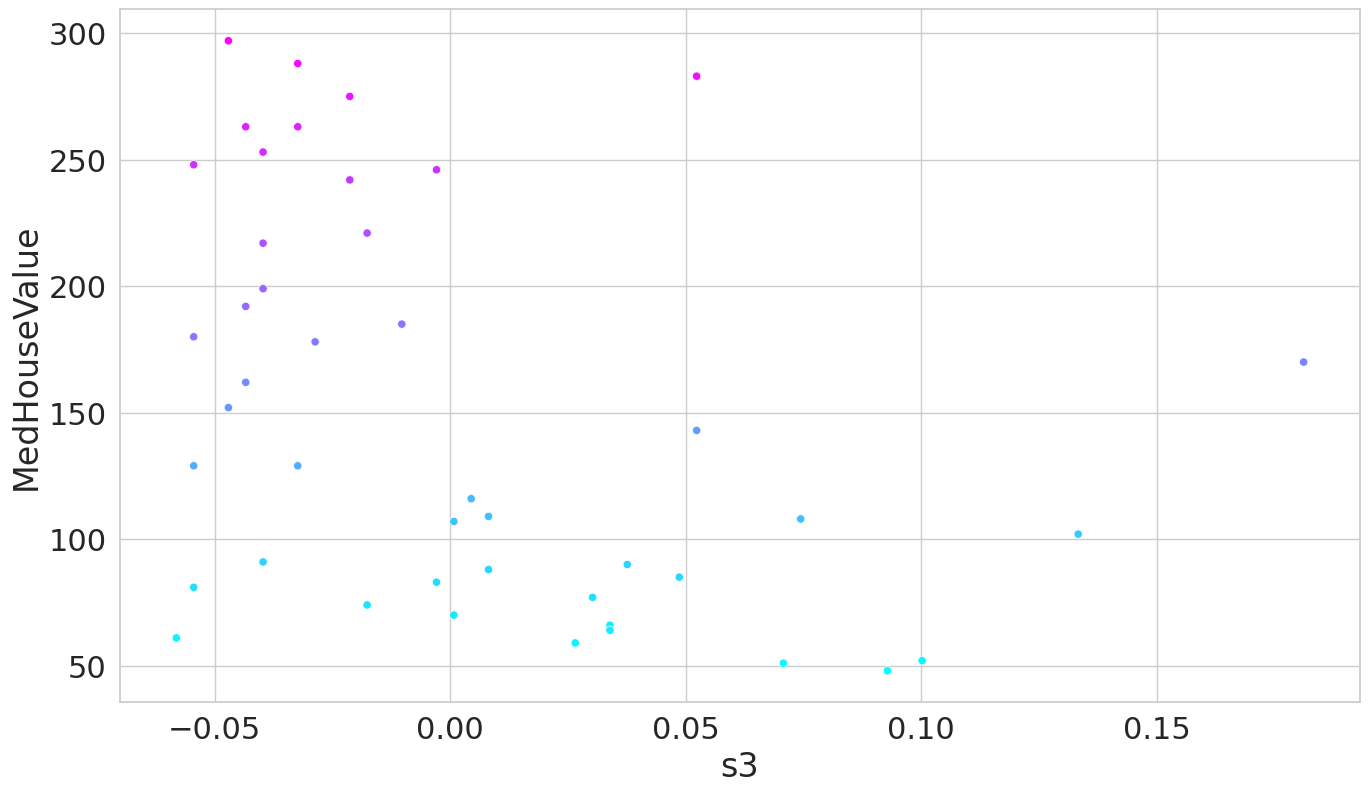

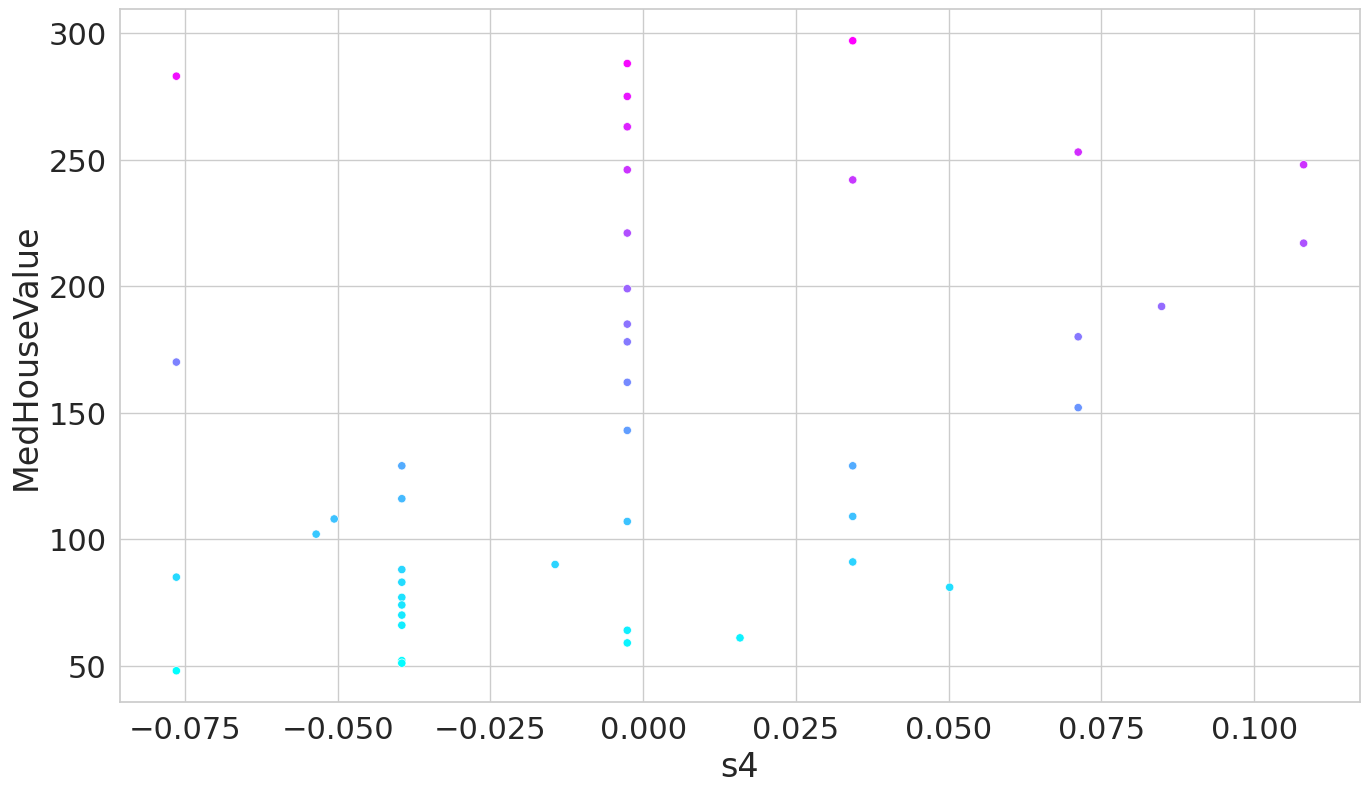

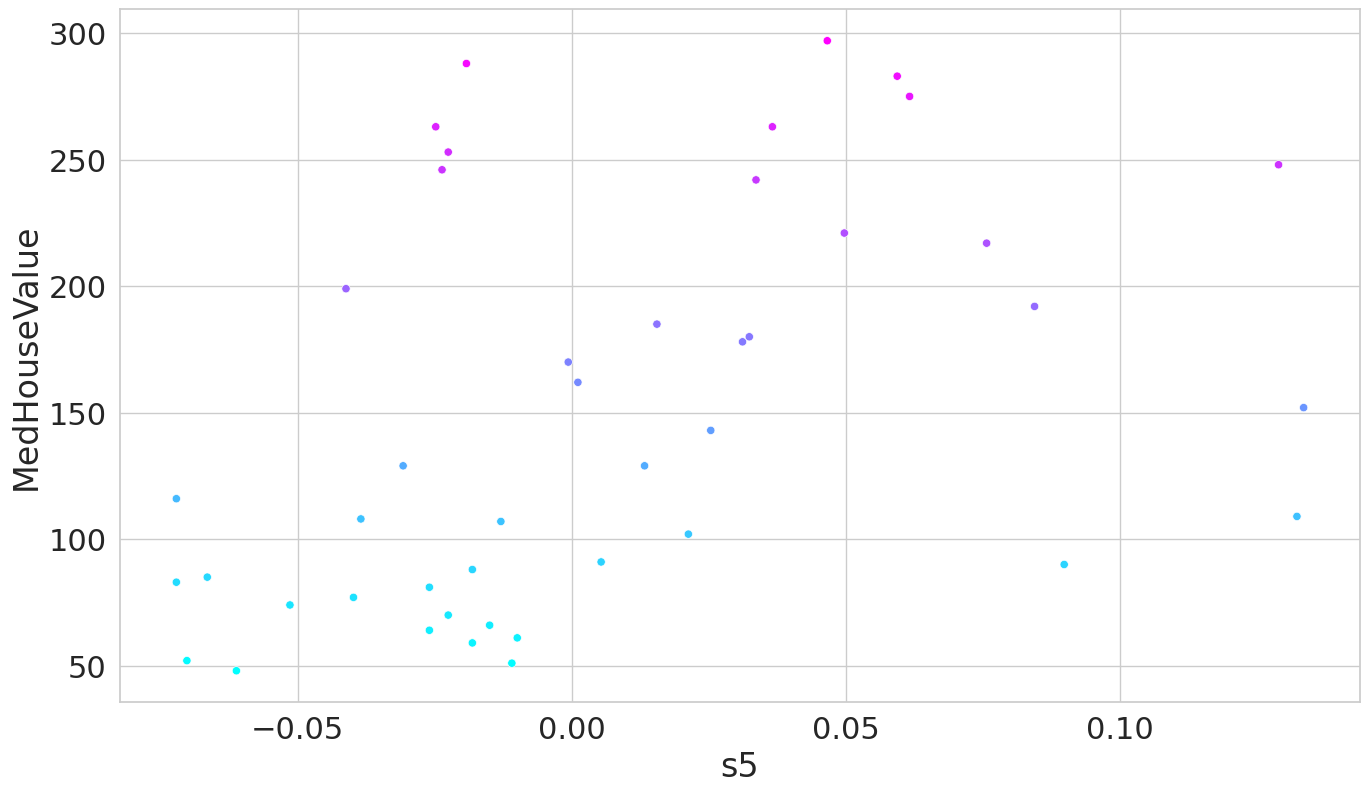

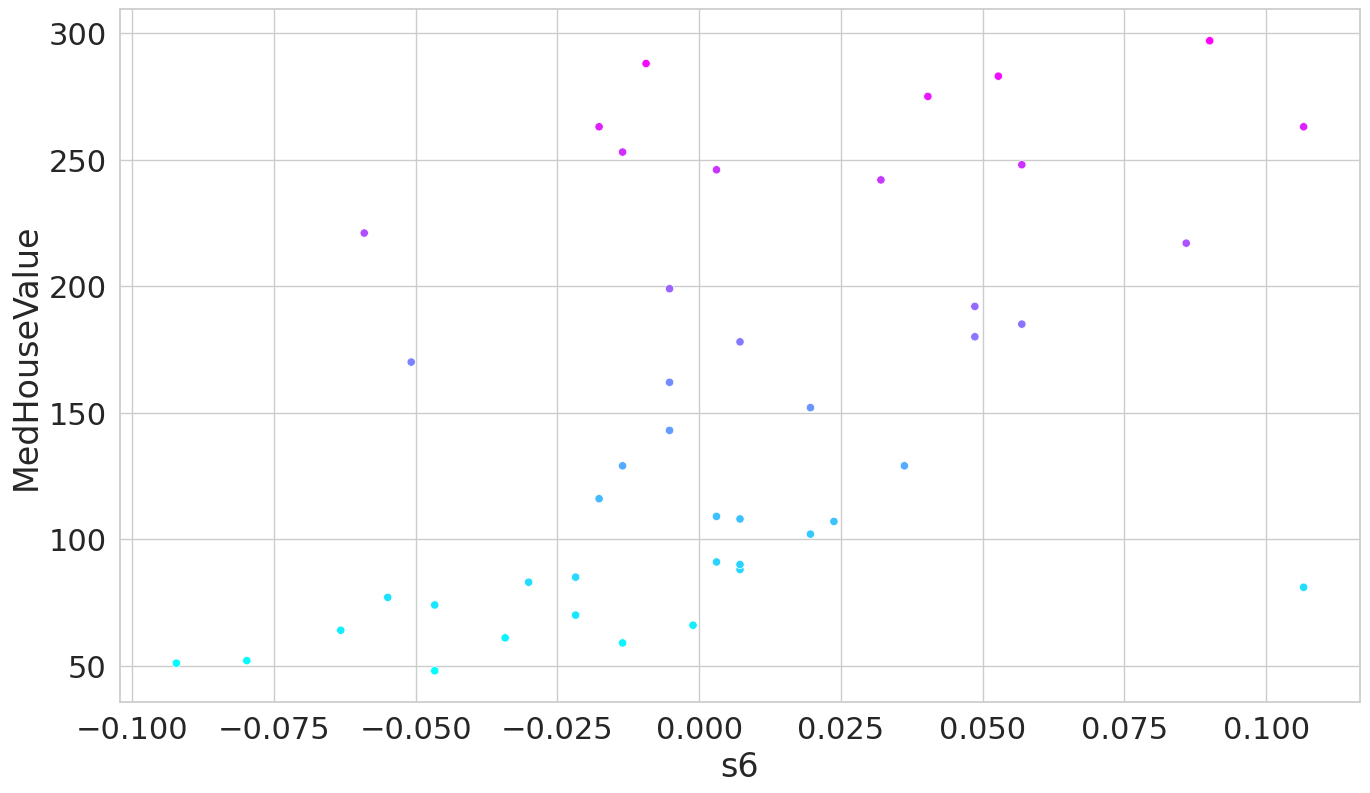

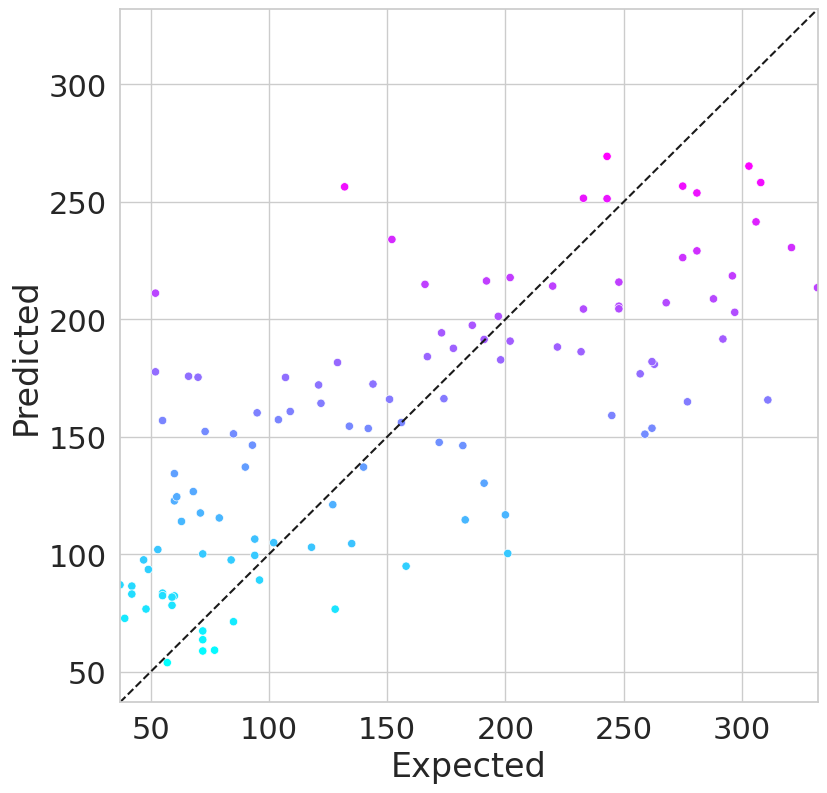

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Display dataset information
print(diabetes.DESCR)  # Show the dataset's description
print(diabetes.data.shape)  # Display the number of samples (rows) and features (columns)
print(diabetes.target.shape)  # Display the number of target values
print(diabetes.feature_names)  # Display names that correspond to each column

# Set options for DataFrame display
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

# Create a DataFrame from the dataset
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['MedHouseValue'] = pd.Series(diabetes.target)

# Display the first few rows of the DataFrame
diabetes_df.head()

# Display summary statistics of the DataFrame
diabetes_df.describe()

# Create a sample DataFrame for visualization
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

# Set seaborn style and font scale
sns.set(font_scale=2)
sns.set_style('whitegrid')

# Create scatter plots for features vs. target
for feature in diabetes.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,
                    y='MedHouseValue', hue='MedHouseValue',
                    palette='cool', legend=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target, random_state=11)

# Display the shape of training and testing sets
X_train.shape
X_test.shape

# Create a Linear Regression model and fit it to the training data
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# Display coefficients for each feature
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10} {linear_regression.coef_[i]}')

# Display the intercept of the Linear Regression model
linear_regression.intercept_

# Predict target values using the Linear Regression model
predicted = linear_regression.predict(X_test)
expected = y_test

# Display the first few predicted and expected values
predicted[:5]
expected[:5]

# Create a DataFrame to compare predicted and expected values
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

# Create a scatter plot comparing expected vs. predicted values
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

# Set axis limits and add a diagonal line
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

# Calculate R-squared and Mean Squared Error
metrics.r2_score(expected, predicted)
metrics.mean_squared_error(expected, predicted)

# Create a dictionary of regression estimators
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# Use KFold cross-validation to evaluate different estimators
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data, y=diabetes.target, cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')
